# Market analysis of the foodservice industry

Investors from the "Shut Up and Take My Money" fund are considering entering the foodservice market in Moscow. Before making a final decision on the type of establishment—whether it’s a café, restaurant, pizzeria, pub, or bar—and deciding on its location, menu, and pricing strategy, a comprehensive market study needs to be conducted.

The objective of this research is to provide investors with a complete picture of the current state of the foodservice market in Moscow. The analysis includes studying the characteristics of various types of establishments, their geographic distribution, the competitive environment, and other key factors. The results of the study will help investors choose the most promising direction for their business and make informed decisions at the next stages of the project.

The analysis uses data on foodservice establishments in Moscow, gathered from Yandex Maps and Yandex Business services during the summer of 2022. The file moscow_places.csv contains the following fields:

- name — the name of the establishment;
- address — the address of the establishment;
- category — the category of the establishment, such as "café," "pizzeria," or "coffee shop";
- hours — information on the establishment's working hours;
- lat — latitude of the geographic location of the establishment;
- lng — longitude of the geographic location of the establishment;
- rating — the establishment's rating based on user reviews on Yandex Maps (maximum rating is 5.0);
- price — the price category of the establishment, such as "average," "below average," "above average," etc.;
- avg_bill — a string representing the average check in a range, for example:
    - "Average bill: 1000–1500 ₽";
    - "Price of a cappuccino: 130–220 ₽";
    - "Price of a glass of beer: 400–600 ₽"; and so on;
- middle_avg_bill — a number representing the median of the two values for rows starting with the string "Average bill":
    - If a range of two values is specified, the median of these two values will be entered into this field.
    - If a single value is provided (without a range), that value will be entered.
    - If the value is missing or doesn't start with the string "Average bill," the field will be left empty.
- middle_coffee_cup — a number representing the price of one cappuccino for rows starting with the string "Price of a cappuccino":
    - If a range of two values is specified, the median of these values will be entered.
    - If a single value is provided, that value will be entered.
    - If the value is missing or doesn't start with the string "Price of a cappuccino," the field will be left empty.
- chain — a binary value (0 or 1) indicating whether the establishment is part of a chain (for small chains, there may be errors);
- district — the administrative district where the establishment is located, such as the Central Administrative District;
- seats — the number of seats.

The report will be divided into several sections:

- The first part of the study will introduce the provided data.
- The second part will focus on data preprocessing and preparation for further analysis.
- In the third part, we will take a closer look at the establishments and describe their quantitative and qualitative characteristics. An exploratory data analysis will be conducted, and the results will be visualized.
- The fourth part will concentrate on the analysis of coffee shops in Moscow to help investors assess the feasibility of opening a new coffee shop similar to "Central Perk" from the TV series "Friends." We will study the number and location of coffee shops, their working hours, ratings, and pricing strategies. Based on this analysis, recommendations will be provided on district selection, pricing strategy, and other key aspects for a successful new establishment opening.
- In the final stage of the research, all findings and conclusions will be compiled into a presentation, which will be delivered to the client.

Ultimately, we will conduct a detailed analysis, the results of which will assist investors in making an informed choice that maximizes commercial efficiency and ensures a successful launch of the establishment.

Before starting the analysis, we will import the necessary libraries and create functions that will be used throughout the project.

In [47]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go
import folium
import geopandas as gpd

In [48]:
def primary_analysis(df):
    
    display("Dataset information:")
    display(df.info())
    
    display("\nFirst 5 rows of the dataset:")
    display(df.head())
    
    display("\nDescription of numeric columns:")
    display(df.describe())
    
    display("\nNumber of duplicate rows in the dataset:")
    display(df.duplicated().sum())
    
    display("\nNumber of missing values in the dataset:")
    display(df.isna().sum())
    
    display("\nFrequency distributions for categorical columns:")
    for column in df.select_dtypes(include=['object', 'category']).columns:
        display(f"\nColumn '{column}':")
        display(df[column].value_counts())


In [49]:
def data_loss(df, df_raw):
    
    # Calculate absolute data loss
    loss_absolute = df_raw['name'].count() - df['name'].count()
    
    # Calculate relative data loss
    loss_relative = 100 - (df['name'].count() / df_raw['name'].count() * 100)
    loss_relative = round(loss_relative, 2)

    # Format as a percentage string
    loss_relative = str(loss_relative) + '%'

    display(f'Absolute data loss: {loss_absolute}')
    display(f'Relative data loss: {loss_relative}')

## Introduction to the Data

Load the dataset and review the general information.

In [50]:
try:
    df = pd.read_csv('/datasets/moscow_places.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/moscow_places.csv')

In [51]:
# Introduce a variable to calculate the data loss metric

try:
    df_raw = pd.read_csv('/datasets/moscow_places.csv')
except:
    df_raw = pd.read_csv('https://code.s3.yandex.net/datasets/moscow_places.csv')

In [52]:
primary_analysis(df)

'Dataset information:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              7870 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              3315 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   int64  
 13  seats              4795 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 919.5+ KB


None

'\nFirst 5 rows of the dataset:'

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,NaN,NaN,NaN,NaN,0,NaN
1,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,0,4.0
2,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",55.889146,37.525901,4.6,средние,Средний счёт:от 1000 ₽,1000.0,NaN,0,45.0
3,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,0,NaN
4,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",55.881166,37.449357,5.0,средние,Средний счёт:400–600 ₽,500.0,NaN,1,148.0


'\nDescription of numeric columns:'

,lat,lng,rating,middle_avg_bill,middle_coffee_cup,chain,seats
count,8406.000000,8406.000000,8406.000000,3149.000000,535.000000,8406.000000,4795.000000
mean,55.750109,37.608570,4.229895,958.053668,174.721495,0.381275,108.421689
std,0.069658,0.098597,0.470348,1009.732845,88.951103,0.485729,122.833396
min,55.573942,37.355651,1.000000,0.000000,60.000000,0.000000,0.000000
25%,55.705155,37.538583,4.100000,375.000000,124.500000,0.000000,40.000000
50%,55.753425,37.605246,4.300000,750.000000,169.000000,0.000000,75.000000
75%,55.795041,37.664792,4.400000,1250.000000,225.000000,1.000000,140.000000
max,55.928943,37.874466,5.000000,35000.000000,1568.000000,1.000000,1288.000000


'\nNumber of duplicate rows in the dataset:'

np.int64(0)

'\nNumber of missing values in the dataset:'

name                    0
category                0
address                 0
district                0
hours                 536
lat                     0
lng                     0
rating                  0
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
chain                   0
seats                3611
dtype: int64

'\nFrequency distributions for categorical columns:'

"\nColumn 'name':"

name
Кафе                189
Шоколадница         120
Домино'с Пицца       76
Додо Пицца           74
One Price Coffee     71
                   ... 
Практика Кофе         1
Суши Мания            1
Миславнес             1
Самовар               1
Woka Noodles          1
Name: count, Length: 5614, dtype: int64

"\nColumn 'category':"

category
кафе               2378
ресторан           2043
кофейня            1413
бар,паб             765
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: count, dtype: int64

"\nColumn 'address':"

address
Москва, проспект Вернадского, 86В       28
Москва, Усачёва улица, 26               26
Москва, площадь Киевского Вокзала, 2    20
Москва, Ярцевская улица, 19             20
Москва, проспект Мира, 211к2            16
                                        ..
Москва, Прибрежный проезд, 7             1
Москва, Большая Косинская улица, 24А     1
Москва, 1-я Новокузьминская улица, 3     1
Москва, Большая Косинская улица, 27      1
Москва, Ферганская улица, вл17-21        1
Name: count, Length: 5753, dtype: int64

"\nColumn 'district':"

district
Центральный административный округ         2242
Северный административный округ             900
Южный административный округ                892
Северо-Восточный административный округ     891
Западный административный округ             851
Восточный административный округ            798
Юго-Восточный административный округ        714
Юго-Западный административный округ         709
Северо-Западный административный округ      409
Name: count, dtype: int64

"\nColumn 'hours':"

hours
ежедневно, 10:00–22:00                                  759
ежедневно, круглосуточно                                730
ежедневно, 11:00–23:00                                  396
ежедневно, 10:00–23:00                                  310
ежедневно, 12:00–00:00                                  254
                                                       ... 
ежедневно, 06:00–21:00                                    1
пн-чт 11:00–23:00; пт,сб 11:00–23:30; вс 11:00–23:00      1
ежедневно, 06:00–02:55                                    1
ежедневно, 07:00–01:00                                    1
пн-чт 10:00–02:00; пт-вс 10:00–03:00                      1
Name: count, Length: 1307, dtype: int64

"\nColumn 'price':"

price
средние          2117
выше среднего     564
высокие           478
низкие            156
Name: count, dtype: int64

"\nColumn 'avg_bill':"

avg_bill
Средний счёт:1000–1500 ₽       241
Средний счёт:1500–2000 ₽       120
Средний счёт:300–500 ₽          90
Средний счёт:500–1000 ₽         78
Средний счёт:1500–2500 ₽        68
                              ... 
Цена бокала пива:170–240 ₽       1
Цена чашки капучино:60–90 ₽      1
Средний счёт:750 ₽               1
Средний счёт:1000–5000 ₽         1
Средний счёт:500–5000 ₽          1
Name: count, Length: 897, dtype: int64

The study includes 8,406 establishments. The dataframe contains several rows with missing values. The missing values are noted in the following columns:

- hours: 536 missing values (information on business days and hours).
- price: 5,091 missing values (price category).
- avg_bill: 4,590 missing values (average bill amount).
- middle_avg_bill: 5,257 missing values (median bill estimate, only available for avg_bill values starting with "Средний счёт").
- middle_coffee_cup: 7,871 missing values (median price for a cup of cappuccino, only available for avg_bill values starting with "Цена одной чашки капучино").
- seats: 3,611 missing values (number of seats).

These issues will be addressed in the next section of the study.

The chain column has 8,406 non-empty values of type int64. However, due to the nature of the data, it is recommended to convert this column to a boolean type. This transformation will also be handled in the next section.

Outliers are observed in the middle_avg_bill, middle_coffee_cup, and seats columns. The outlier boundaries will be calculated using the interquartile range (IQR) method:  1.5 × IQR. Specifically:

- Values above 2,500 in middle_avg_bill can be considered outliers. Zero values should also be reviewed.
- Values above 375 in middle_coffee_cup can be considered outliers.
- In the seats column, rows with values greater than 290 or equal to 0 can be considered outliers.

We will examine these outliers more closely in the next section.

No duplicates were found in the dataset.

The data covers all categories and districts, with cafes and restaurants leading in popularity. Among districts, the Central Administrative District ranks first. Regarding operating hours, despite missing values, two patterns dominate: 10:00 AM to 10:00 PM and 24/7 operations. The price column suggests the analysis focuses on establishments with average price categories.

In general, the data appears suitable for analysis. Using these observations, we will proceed to data preprocessing, during which we will:

1. Examine missing values in more detail.
2. Adjust data types as necessary.
3. Analyze outliers.
4. Create a new column, street, to extract street names from the address column.
5. Create a new column, is_24_7, to indicate whether an establishment operates daily and around the clock:
    - Logical value True: if the establishment operates 24/7.
    - Logical value False: otherwise.

## Data Preprocessing

First, let's take a look at the missing values.

In [53]:
missing_data = df[(df['hours'].isna()) & (df['price'].isna()) & (df['avg_bill'].isna())]
missing_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 528 entries, 38 to 8395
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               528 non-null    object 
 1   category           528 non-null    object 
 2   address            528 non-null    object 
 3   district           528 non-null    object 
 4   hours              0 non-null      object 
 5   lat                528 non-null    float64
 6   lng                528 non-null    float64
 7   rating             528 non-null    float64
 8   price              0 non-null      object 
 9   avg_bill           0 non-null      object 
 10  middle_avg_bill    0 non-null      float64
 11  middle_coffee_cup  0 non-null      float64
 12  chain              528 non-null    int64  
 13  seats              293 non-null    float64
dtypes: float64(6), int64(1), object(7)
memory usage: 61.9+ KB


- hours: 536 missing values (information on days and hours of operation).

It is unlikely that there are columns directly correlating with operating hours. Theoretically, we could attempt to find a relationship with columns like district and category, but this wouldn't always be accurate, as operating hours depend on numerous factors and are often unique to each establishment. Therefore, recovering these values is not feasible.

From the output above, we observe that establishments missing information in the hours column also lack data

In [54]:
condition = (df['hours'].isna())
df = df[~condition]
df.isna().sum()

name                    0
category                0
address                 0
district                0
hours                   0
lat                     0
lng                     0
rating                  0
price                4560
avg_bill             4062
middle_avg_bill      4727
middle_coffee_cup    7336
chain                   0
seats                3375
dtype: int64

- price: 4,560 missing values (price category).

Since more than half of the rows have missing values, filling them in accurately would be challenging. We could use average values for specific categories of establishments or regions, but this might distort the data. It's better to leave the values as they are. We'll replace the missing values with "Unknown".

In [55]:
df['price'] = df['price'].fillna(value='Unknow') 
df.isna().sum()

name                    0
category                0
address                 0
district                0
hours                   0
lat                     0
lng                     0
rating                  0
price                   0
avg_bill             4062
middle_avg_bill      4727
middle_coffee_cup    7336
chain                   0
seats                3375
dtype: int64

- avg_bill: 4,062 missing values (average bill).

Similar to the "price" column, this column also has a large number of missing values. We will perform the same actions as with the "price" column, replacing the missing values with "Unknown".

In [56]:
df['avg_bill'] = df['avg_bill'].fillna(value='Unknow') 
df.isna().sum()

name                    0
category                0
address                 0
district                0
hours                   0
lat                     0
lng                     0
rating                  0
price                   0
avg_bill                0
middle_avg_bill      4727
middle_coffee_cup    7336
chain                   0
seats                3375
dtype: int64

The columns middle_avg_bill and middle_coffee_cup are directly linked to the avg_bill column, where the missing data could not be recovered. Therefore, we will leave these columns as they are. The same approach applies to the seats column.

Let us calculate how much data was lost after the performed manipulations.

In [57]:
data_loss(df,df_raw)

'Absolute data loss: 536'

'Relative data loss: 6.38%'

We lost about 5% of the data, which is a relatively small loss. Let’s move on.

Let’s change the data type of the chain column to the appropriate one.

In [58]:
df['chain'] = df['chain'].astype(bool)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7870 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               7870 non-null   object 
 1   category           7870 non-null   object 
 2   address            7870 non-null   object 
 3   district           7870 non-null   object 
 4   hours              7870 non-null   object 
 5   lat                7870 non-null   float64
 6   lng                7870 non-null   float64
 7   rating             7870 non-null   float64
 8   price              7870 non-null   object 
 9   avg_bill           7870 non-null   object 
 10  middle_avg_bill    3143 non-null   float64
 11  middle_coffee_cup  534 non-null    float64
 12  chain              7870 non-null   bool   
 13  seats              4495 non-null   float64
dtypes: bool(1), float64(6), object(7)
memory usage: 868.5+ KB


Let’s analyze the number of rows (outliers) where the middle_avg_bill column (a numerical estimate of the average bill) exceeds 2500:

In [59]:
middle_avg_bill_high = df[(df['middle_avg_bill'])>2500]
middle_avg_bill_high.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104 entries, 293 to 8297
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               104 non-null    object 
 1   category           104 non-null    object 
 2   address            104 non-null    object 
 3   district           104 non-null    object 
 4   hours              104 non-null    object 
 5   lat                104 non-null    float64
 6   lng                104 non-null    float64
 7   rating             104 non-null    float64
 8   price              104 non-null    object 
 9   avg_bill           104 non-null    object 
 10  middle_avg_bill    104 non-null    float64
 11  middle_coffee_cup  0 non-null      float64
 12  chain              104 non-null    bool   
 13  seats              70 non-null     float64
dtypes: bool(1), float64(6), object(7)
memory usage: 11.5+ KB


Let’s also take a look at the rows where the value in the middle_avg_bill column is 0.

In [60]:
middle_avg_bill_low = df[(df['middle_avg_bill'])==0]
middle_avg_bill_low

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
3688,Кофемания,кофейня,"Москва, улица Новый Арбат, 19",Центральный административный округ,"ежедневно, круглосуточно",55.752136,37.587784,4.5,высокие,Средний счёт:от 0 ₽,0.0,NaN,True,200.0


We will remove these rows to avoid distorting the overall picture.

In [61]:
condition = ((df['middle_avg_bill'] > 2500) | (df['middle_avg_bill'] == 0))
df = df[~condition]

Let’s move on to the column middle_coffee_cup, where the outlier value was determined to be 375.

In [62]:
middle_coffee_cup_high = df[(df['middle_coffee_cup'])>375]
middle_coffee_cup_high

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
2859,Шоколадница,кофейня,"Москва, Большая Семёновская улица, 27, корп. 1",Восточный административный округ,"ежедневно, 08:00–23:00",55.782268,37.709022,4.2,средние,Цена чашки капучино:230–2907 ₽,NaN,1568.0,True,48.0


Let’s remove these data points to avoid distorting the overall picture.

In [63]:
condition = ((df['middle_coffee_cup'])>375)
df = df[~condition]

Now let’s move on to the number of seats. Here, we’ll set 1,000 seats as the threshold.

In [64]:
seats_high = df[(df['seats'])>1000]
seats_high

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
2713,Ваня и Гоги,"бар,паб","Москва, Измайловское шоссе, 71, корп. А",Восточный административный округ,"ежедневно, 11:00–06:00",55.789842,37.750282,4.2,высокие,Средний счёт:1000–2500 ₽,1750.0,NaN,False,1040.0
2722,Маргарита,быстрое питание,"Москва, Измайловское шоссе, 71, корп. А",Восточный административный округ,"ежедневно, 10:00–22:00",55.789527,37.752004,4.3,Unknow,Unknow,NaN,NaN,True,1040.0
2770,Шоколадница,кофейня,"Москва, Измайловское шоссе, 71, корп. А",Восточный административный округ,"пн-ср 11:00–23:00; чт 11:00–00:00; пт,сб 11:00...",55.789903,37.749822,4.1,Unknow,Unknow,NaN,NaN,True,1040.0
6518,DelonixCafe,ресторан,"Москва, проспект Вернадского, 94, корп. 1",Западный административный округ,"ежедневно, круглосуточно",55.652577,37.475730,4.1,высокие,Средний счёт:1500–2000 ₽,1750.0,NaN,False,1288.0
6524,Ян Примус,ресторан,"Москва, проспект Вернадского, 121, корп. 1",Западный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–02:00; вс 12:00...",55.657166,37.481519,4.5,выше среднего,Средний счёт:1500 ₽,1500.0,NaN,True,1288.0
6574,Мюнгер,пиццерия,"Москва, проспект Вернадского, 97, корп. 1",Западный административный округ,"пн-пт 08:00–21:00; сб,вс 10:00–21:00",55.667505,37.491001,4.8,Unknow,Unknow,NaN,NaN,True,1288.0
6641,One Price Coffee,кофейня,"Москва, проспект Вернадского, 84, стр. 1",Западный административный округ,"ежедневно, 08:30–20:00",55.665129,37.478635,4.3,Unknow,Unknow,NaN,NaN,True,1288.0
6658,ГудБар,"бар,паб","Москва, проспект Вернадского, 97, корп. 1",Западный административный округ,"пн-пт 11:00–23:00; сб,вс 13:00–23:00",55.667327,37.490601,4.1,средние,Средний счёт:700 ₽,700.0,NaN,False,1288.0
6807,Loft-cafe академия,кафе,"Москва, проспект Вернадского, 84, стр. 1",Западный административный округ,пн-пт 09:00–20:00; сб 09:00–16:00,55.665142,37.478603,3.6,Unknow,Unknow,NaN,NaN,False,1288.0
6808,Яндекс Лавка,ресторан,"Москва, проспект Вернадского, 51, стр. 1",Западный административный округ,"ежедневно, круглосуточно",55.672580,37.507753,4.0,Unknow,Unknow,NaN,NaN,True,1288.0


Let's also take a look at rows where the value is 0:

In [65]:
seats_low = df[(df['seats'])==0]
seats_low.info()

<class 'pandas.core.frame.DataFrame'>
Index: 126 entries, 84 to 8362
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               126 non-null    object 
 1   category           126 non-null    object 
 2   address            126 non-null    object 
 3   district           126 non-null    object 
 4   hours              126 non-null    object 
 5   lat                126 non-null    float64
 6   lng                126 non-null    float64
 7   rating             126 non-null    float64
 8   price              126 non-null    object 
 9   avg_bill           126 non-null    object 
 10  middle_avg_bill    32 non-null     float64
 11  middle_coffee_cup  13 non-null     float64
 12  chain              126 non-null    bool   
 13  seats              126 non-null    float64
dtypes: bool(1), float64(6), object(7)
memory usage: 13.9+ KB


Let's remove these values from the dataframe as well:

In [66]:
condition = (((df['seats'])>1000) | ((df['seats'])==0))
df = df[~condition]

Let's look at the final data loss:

In [67]:
data_loss(df,df_raw)

'Absolute data loss: 779'

'Relative data loss: 9.27%'

After data preprocessing, the data loss rate is approximately 10 percent, which is an acceptable value. We can proceed further.

We will also create a street column containing the street names extracted from the address column.

In [68]:
df['street'] = df['address'].str.replace('Москва, ', '', regex=False)
df

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,street
0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,Unknow,Unknow,NaN,NaN,False,NaN,"улица Дыбенко, 7/1"
1,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,False,4.0,"улица Дыбенко, 36, корп. 1"
2,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",55.889146,37.525901,4.6,средние,Средний счёт:от 1000 ₽,1000.0,NaN,False,45.0,"Клязьминская улица, 15"
3,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,Unknow,Цена чашки капучино:155–185 ₽,NaN,170.0,False,NaN,"улица Маршала Федоренко, 12"
4,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",55.881166,37.449357,5.0,средние,Средний счёт:400–600 ₽,500.0,NaN,True,148.0,"Правобережная улица, 1Б"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8401,Суши Мания,кафе,"Москва, Профсоюзная улица, 56",Юго-Западный административный округ,"ежедневно, 09:00–02:00",55.670021,37.552480,4.4,Unknow,Unknow,NaN,NaN,False,86.0,"Профсоюзная улица, 56"
8402,Миславнес,кафе,"Москва, Пролетарский проспект, 19, корп. 1",Южный административный округ,"ежедневно, 08:00–22:00",55.640875,37.656553,4.8,Unknow,Unknow,NaN,NaN,False,150.0,"Пролетарский проспект, 19, корп. 1"
8403,Самовар,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",55.648859,37.743219,3.9,Unknow,Средний счёт:от 150 ₽,150.0,NaN,False,150.0,"Люблинская улица, 112А, стр. 1"
8404,Чайхана Sabr,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",55.648849,37.743222,4.2,Unknow,Unknow,NaN,NaN,True,150.0,"Люблинская улица, 112А, стр. 1"


We will create a is_24_7 column indicating whether the establishment operates 24/7:

- Boolean value True — if the establishment operates daily and around the clock;
- Boolean value False — otherwise.

In [69]:
def is_24_7(hours):
    if 'daily' in hours and '24/7' in hours:
        return True
    return False

df['is_24_7'] = df['hours'].apply(is_24_7)
df

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,street,is_24_7
0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,Unknow,Unknow,NaN,NaN,False,NaN,"улица Дыбенко, 7/1",False
1,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,False,4.0,"улица Дыбенко, 36, корп. 1",False
2,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",55.889146,37.525901,4.6,средние,Средний счёт:от 1000 ₽,1000.0,NaN,False,45.0,"Клязьминская улица, 15",False
3,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,Unknow,Цена чашки капучино:155–185 ₽,NaN,170.0,False,NaN,"улица Маршала Федоренко, 12",False
4,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",55.881166,37.449357,5.0,средние,Средний счёт:400–600 ₽,500.0,NaN,True,148.0,"Правобережная улица, 1Б",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8401,Суши Мания,кафе,"Москва, Профсоюзная улица, 56",Юго-Западный административный округ,"ежедневно, 09:00–02:00",55.670021,37.552480,4.4,Unknow,Unknow,NaN,NaN,False,86.0,"Профсоюзная улица, 56",False
8402,Миславнес,кафе,"Москва, Пролетарский проспект, 19, корп. 1",Южный административный округ,"ежедневно, 08:00–22:00",55.640875,37.656553,4.8,Unknow,Unknow,NaN,NaN,False,150.0,"Пролетарский проспект, 19, корп. 1",False
8403,Самовар,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",55.648859,37.743219,3.9,Unknow,Средний счёт:от 150 ₽,150.0,NaN,False,150.0,"Люблинская улица, 112А, стр. 1",False
8404,Чайхана Sabr,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",55.648849,37.743222,4.2,Unknow,Unknow,NaN,NaN,True,150.0,"Люблинская улица, 112А, стр. 1",False


All data preprocessing tasks have been completed. We can move on to the next steps.

## Exploratory Data Analysis

In the exploratory data analysis, we will answer a couple of questions.

Let's take another look at the types of establishments represented in the data.

In [70]:
category_counts = df['category'].value_counts().reset_index()
category_counts.columns = ['category', 'count']
category_counts

,category,count
0,кафе,1960
1,ресторан,1869
2,кофейня,1369
3,"бар,паб",729
4,пиццерия,613
5,быстрое питание,549
6,столовая,300
7,булочная,238


Examine the number of food establishments by categories: restaurants, cafes, pizzerias, bars, and so on. Create visualizations. Answer the question about the distribution of establishments by categories.

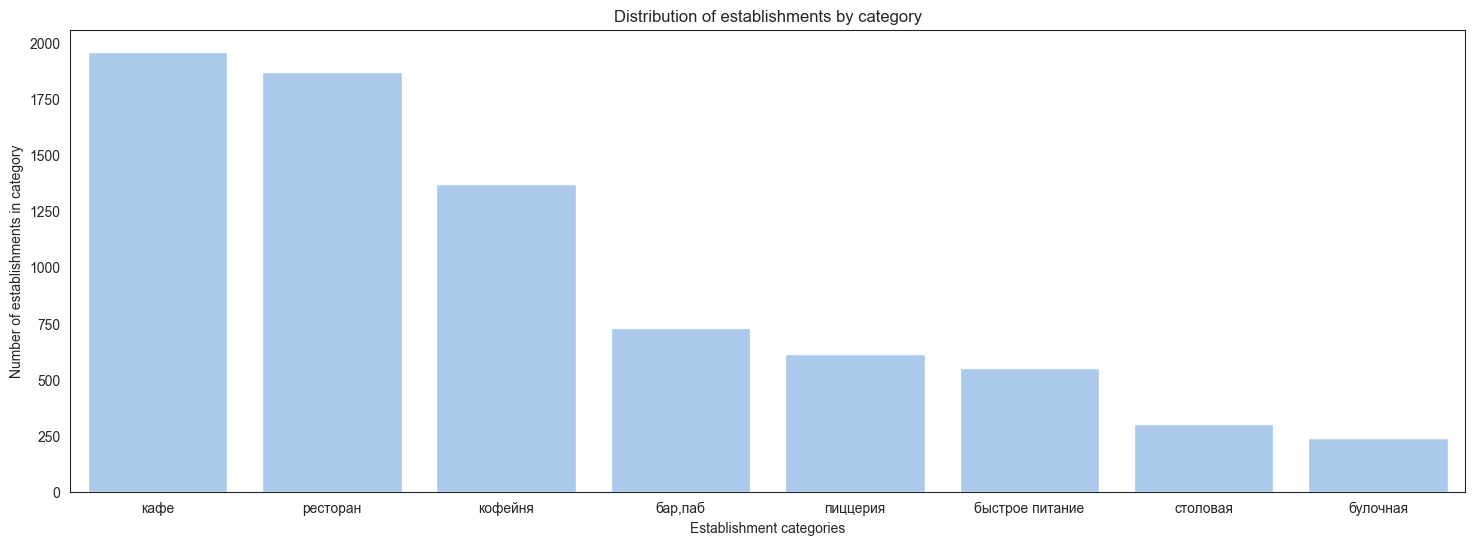

In [71]:
plt.figure(figsize=(18, 6))
sns.set_palette('pastel')
sns.set_style('white')
ax = sns.barplot(x='category', y='count', data=category_counts)
ax.set_title('Distribution of establishments by category')
ax.set_xlabel('Establishment categories')
ax.set_ylabel('Number of establishments in category')
plt.show()

In [72]:
fig = go.Figure(data=[go.Pie(labels=category_counts['category'], values=category_counts['count'])])
fig.show()

It can be concluded that cafes and restaurants dominate this distribution, while canteens and bakeries occupy smaller shares.

Let's explore the number of seats in establishments by categories: restaurants, cafes, pizzerias, bars, and so on. We will create visualizations and analyze the results.

In [73]:
category_seats_counts = df.groupby('category')['seats'].sum().sort_values(ascending=False).reset_index()
category_seats_counts.columns = ['category', 'count_seats']
category_seats_counts

,category,count_seats
0,ресторан,136613.0
1,кафе,95337.0
2,кофейня,79327.0
3,"бар,паб",52333.0
4,пиццерия,38492.0
5,быстрое питание,31267.0
6,столовая,14559.0
7,булочная,13148.0


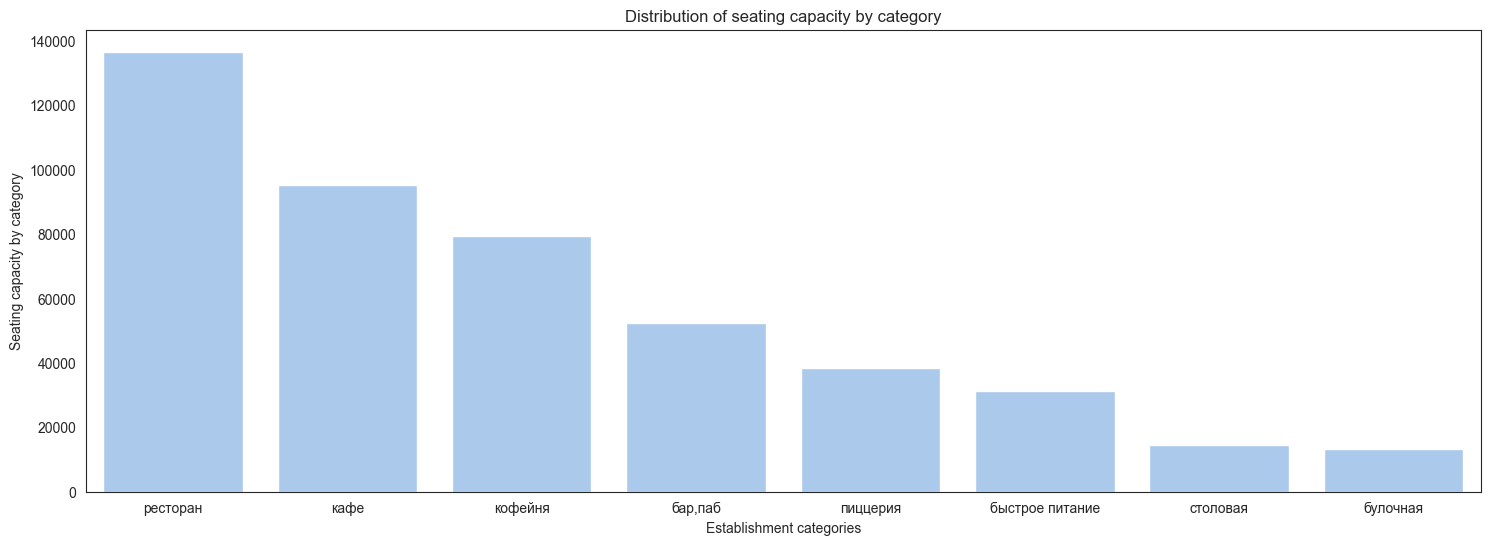

In [74]:
plt.figure(figsize=(18, 6))
sns.set_palette('pastel')
sns.set_style('white')
ax = sns.barplot(x='category', y='count_seats', data=category_seats_counts)
ax.set_title('Distribution of seating capacity by category')
ax.set_xlabel('Establishment categories')
ax.set_ylabel('Seating capacity by category')
plt.show()

In [75]:
fig = go.Figure(data=[go.Pie(labels=category_seats_counts['category'], values=category_seats_counts['count_seats'])])
fig.show()

The following conclusions can be made:

- Restaurants and cafes lead in the number of seats, indicating their high popularity and demand.
- Cafes and bars/pubs also hold a significant share but lag behind restaurants and cafes.
- Bakeries and cafeterias occupy a small portion, which could indicate their lesser contribution to the overall foodservice industry.

The distribution mirrors the trend seen in the previous chart of establishments by category. Additionally, as we recall from the data preprocessing module, many values in the "seats" column were missing.

Consider and visualize the ratio of chain and non-chain establishments in the dataset.

In [76]:
chain_counts = df['chain'].value_counts().reset_index()
chain_counts.columns = ['chain', 'count']
chain_counts['chain'] = chain_counts['chain'].replace({False: 'Не сетевой'})
chain_counts['chain'] = chain_counts['chain'].replace({True: 'Сетевой'})
chain_counts

,chain,count
0,Не сетевой,4603
1,Сетевой,3024


In [77]:
fig = go.Figure(data=[go.Pie(labels=chain_counts['chain'], values=chain_counts['count'])])
fig.show()

Chain establishments are only 10% less than non-chain establishments. The difference is not significant, but it is still present.

Let's try to determine which categories of establishments are more likely to be part of a chain. We will explore the data and answer the question with a chart.

In [78]:
category_chain_counts = df.groupby('category')['chain'].sum().sort_values(ascending=False).reset_index(name='chain_count')
category_chain_counts

,category,chain_count
0,кофейня,700
1,кафе,699
2,ресторан,696
3,пиццерия,323
4,быстрое питание,215
5,"бар,паб",156
6,булочная,150
7,столовая,85


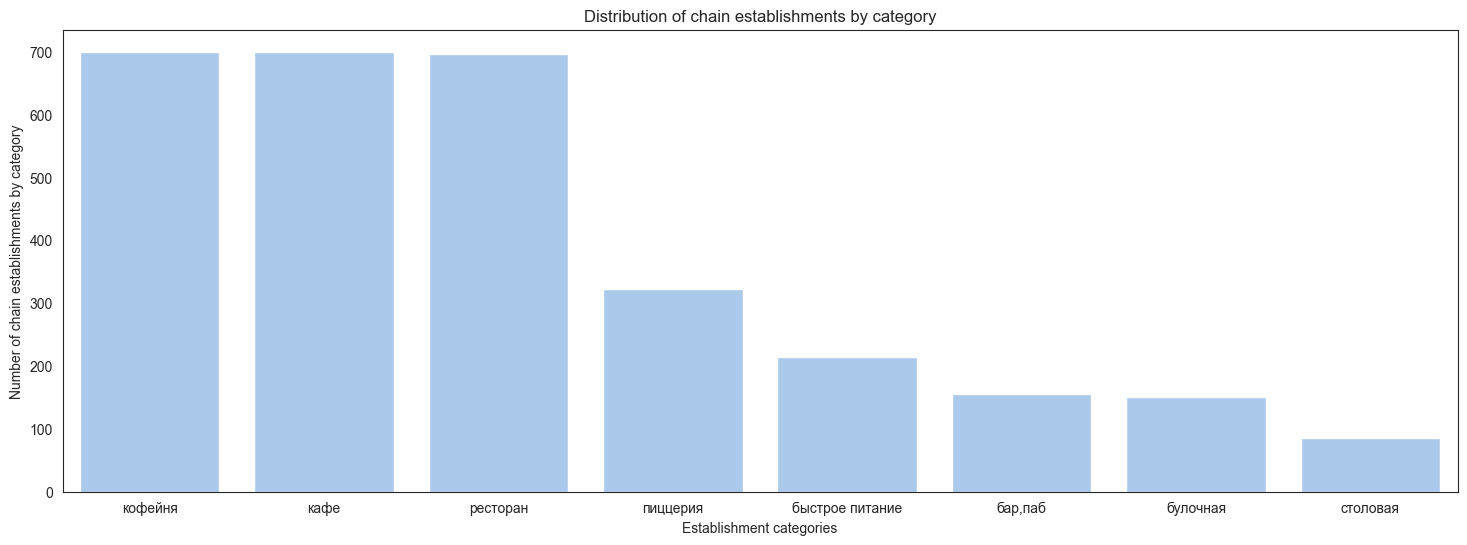

In [79]:
plt.figure(figsize=(18, 6))
sns.set_palette('pastel')
sns.set_style('white')
ax = sns.barplot(x='category', y='chain_count', data=category_chain_counts)
ax.set_title('Distribution of chain establishments by category')
ax.set_xlabel('Establishment categories')
ax.set_ylabel('Number of chain establishments by category')
plt.show()

In [80]:
fig = go.Figure(data=[go.Pie(labels=category_chain_counts['category'], values=category_chain_counts['chain_count'])])
fig.show()

We can observe that three equal shares are distributed among three categories: coffee shop, café, and restaurant. Next is the pizzeria. At the bottom of the distribution are the already familiar bakery and cafeteria.

Let's group the data by the names of establishments and find the top 15 most popular chains in Moscow. We will create a suitable visualization for this information and answer a few questions:

- Are we familiar with these chains?
- Is there any characteristic that unites them?
- To which category of establishments do they belong?

We will also display the total number of establishments and the number of establishments in each category by district.

In [81]:
# Grouping data by establishment names and counting occurrences
top_chains = (
    df.groupby('name')
    .size()
    .reset_index(name='count')
    .sort_values(by='count', ascending=False)
    .head(15)
)

What administrative districts of Moscow are present in the dataset? Display the total number of establishments and the number of establishments per category by district. Try to illustrate this information with a single chart.

category                                 бар,паб  булочная  быстрое питание  \
district                                                                      
Центральный административный округ           354        50               83   
Северный административный округ               63        34               51   
Северо-Восточный административный округ       57        26               78   
Южный административный округ                  64        23               80   
Западный административный округ               47        36               59   
Восточный административный округ              50        22               62   
Юго-Западный административный округ           37        25               55   
Юго-Восточный административный округ          35        10               54   
Северо-Западный административный округ        22        12               27   

category                                 кафе  кофейня  пиццерия  ресторан  \
district                                            

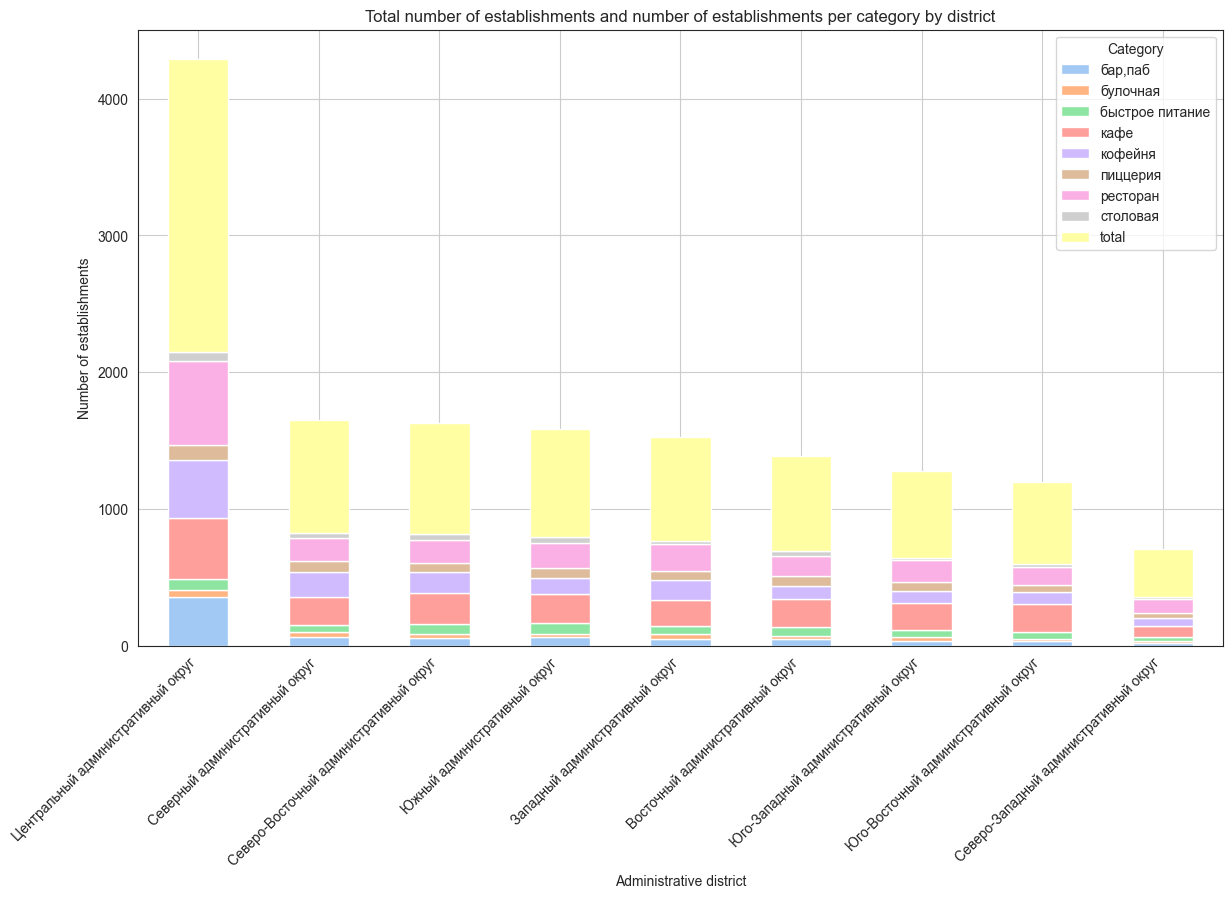

In [82]:
# Grouping data by districts and categories

district_grouped = (
    df.groupby(['district', 'category'])
    .size()
    .unstack(fill_value=0)  # Transforming the data so that categories become columns
)

# Adding a column with the total number of establishments in the district

district_grouped['total'] = district_grouped.sum(axis=1)

# Sorting data by the total number of establishments
district_grouped = district_grouped.sort_values(by='total', ascending=False)

# Print the administrative districts and the number of establishments in them
print(district_grouped)

# Plotting the chart
district_grouped.plot(kind='bar', stacked=True, figsize=(14, 8))

plt.title('Total number of establishments and number of establishments per category by district')
plt.xlabel('Administrative district')
plt.ylabel('Number of establishments')
plt.legend(title='Category')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

Visualize the distribution of average ratings across establishment categories. Do the average ratings differ significantly between different types of eateries?

C:\Users\Артемий Иванилов\AppData\Local\Temp\ipykernel_18688\3999774403.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




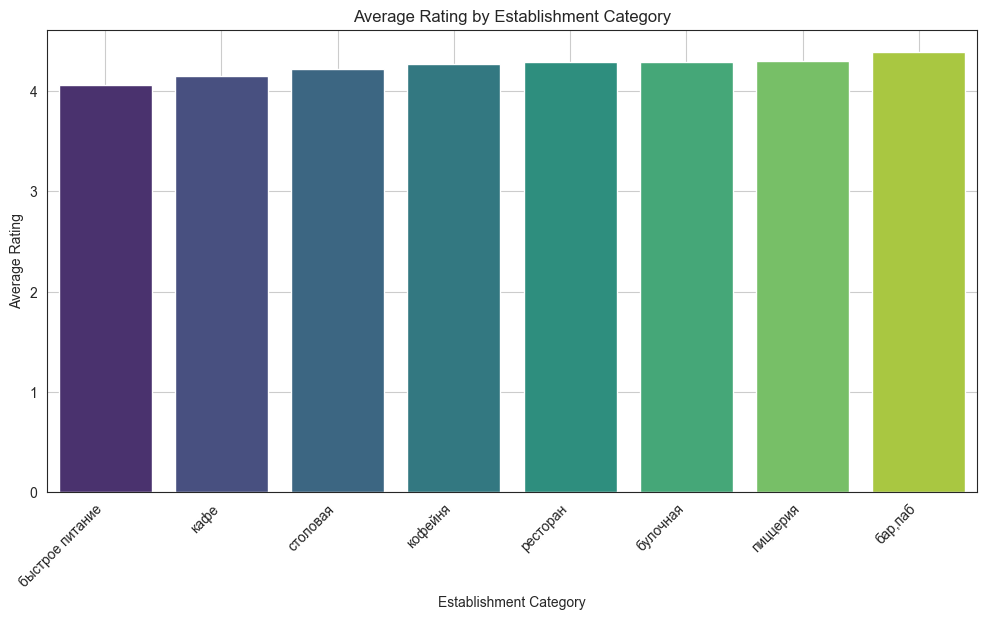

In [83]:
# Assume that your dataframe df contains columns 'category' and 'rating'.

# Grouping data by categories and calculating the average rating
category_ratings = df.groupby('category')['rating'].mean().sort_values()

# Plotting the graph
plt.figure(figsize=(12, 6))
sns.barplot(x=category_ratings.index, y=category_ratings.values, palette='viridis')

# Add labels and title
plt.title('Average Rating by Establishment Category') 
plt.xlabel('Establishment Category') 
plt.ylabel('Average Rating') 
plt.xticks(rotation=45, ha='right') 
plt.grid(True)

# Show the plot
plt.show()

Build a choropleth map showing the average rating of establishments in each district. The boundaries of the districts in Moscow that appear in the dataset are stored in the admin_level_geomap.geojson file.

In [91]:
with open('admin_level_geomap.geojson', 'r') as f:
    geo_json = json.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'admin_level_geomap.geojson'

In [86]:
# Step 1: Load the district boundaries data for Moscow
geo_data = gpd.read_file('admin_level_geomap.geojson')

# Assume that your main dataframe is named df and contains 'region' and 'rating' columns

# Step 2: Prepare the data on average ratings by district
region_ratings = df.groupby('region')['rating'].mean().reset_index()

# Rename the column for merging
region_ratings.columns = ['name', 'avg_rating']

# Step 3: Merge the district boundaries data and average ratings
geo_data = geo_data.merge(region_ratings, on='name')

# Step 4: Build the choropleth map
plt.figure(figsize=(12, 8))
geo_data.plot(column='avg_rating', cmap='coolwarm', legend=True,
              legend_kwds={'label': "Average Rating of Establishments by District",
                           'orientation': "horizontal"},
              edgecolor='black', linewidth=0.5)

# Customize the plot
plt.title('Choropleth Map of Average Establishment Ratings by Moscow District', fontsize=15)
plt.axis('off')  # Turn off axes
plt.show()

DataSourceError: admin_level_geomap.geojson: No such file or directory

Display all the establishments from the dataset on a map using clusters with the folium library.

In [ ]:
# Assume df is your dataframe containing establishments with 'name', 'lat' (latitude), and 'lng' (longitude) columns
# Example data (replace with your actual data)
data = {
    'name': ['Cafe 1', 'Restaurant 2', 'Bar 3', 'Cafe 4', 'Pizzeria 5'],
    'lat': [55.751244, 55.751345, 55.752344, 55.750345, 55.749234],
    'lng': [37.618423, 37.618564, 37.616678, 37.614567, 37.620123]
}

df = pd.DataFrame(data)

# Step 3: Create map
map_moscow = folium.Map(location=[55.751244, 37.618423], zoom_start=11)

# Step 4: Add clusters to the map
marker_cluster = MarkerCluster().add_to(map_moscow)

for idx, row in df.iterrows():
    folium.Marker(
        location=[row['lat'], row['lng']],
        popup=row['name'],
    ).add_to(marker_cluster)

# Step 5: Display the map
map_moscow.save("moscow_venues_map.html")
map_moscow

Find the top 15 streets by the number of establishments. Create a chart to visualize the distribution of the number of establishments and their categories across these streets. Try to illustrate this information in a single chart.

In [ ]:
top_streets = (df['street']
               .value_counts()
               .nlargest(15)
               .index)

# Filter the dataframe for only these streets
df_top_streets = df[df['street'].isin(top_streets)]

# Step 2: Prepare data for visualization
# Group the data by street and category, and count the occurrences
street_category_counts = (df_top_streets.groupby(['street', 'category'])
                          .size()
                          .reset_index(name='count'))

# Step 3: Plotting the graph
plt.figure(figsize=(14, 8))
sns.barplot(x='count', y='street', hue='category', data=street_category_counts, palette='muted')

# Set up the chart
plt.title('Distribution of establishments and their categories across top-15 streets in Moscow', fontsize=16)
plt.xlabel('Number of establishments', fontsize=12)
plt.ylabel('Street', fontsize=12)
plt.legend(title='Category', loc='upper right')

# Show the plot
plt.show()

Find the streets that have only one establishment. What can be said about these establishments?

In [ ]:
# Assume your dataframe is called df and contains a 'street' column with street names
# and 'category' (or other columns with establishment information)

# Step 1: Count the number of establishments on each street
street_counts = df['street'].value_counts()

# Step 2: Find streets with only one establishment
single_street = street_counts[street_counts == 1].index

# Filter the original dataframe to keep only those streets
single_street_df = df[df['street'].isin(single_street)]

# Step 3: Print information about these streets and establishments
print(single_street_df)

# Check the distribution of categories on these streets
single_street_categories = single_street_df['category'].value_counts()
print(single_street_categories)

The values of the average bills of establishments are stored in the column middle_avg_bill. These numbers represent the approximate cost of an order in rubles, which is often expressed as a range. Calculate the median of this column for each district. Use this value as a price indicator for the district. Build a choropleth map with the obtained values for each district. Analyze the prices in the central administrative district and others. How does the distance from the center affect the prices in establishments?

In [ ]:
import pandas as pd

# Assume that your dataframe is called df and contains the columns 'district' and 'middle_avg_bill' (average bill)

# Calculate the median of the average bill for each district
median_avg_bill_by_district = df.groupby('district')['middle_avg_bill'].median().reset_index()

# Rename the columns for convenience
median_avg_bill_by_district.columns = ['district', 'median_avg_bill']

# View the result
print(median_avg_bill_by_district)

In [ ]:
# Loading geodata for Moscow
moscow_geo = gpd.read_file('admin_level_geomap.geojson')

# Merging median data with geodata
district_geo = moscow_geo.merge(median_avg_bill_by_district, left_on='district_name', right_on='district')

# Creating a map of Moscow
m = folium.Map(location=[55.751244, 37.618423], zoom_start=10)

# Adding choropleth to the map
folium.Choropleth(
    geo_data=district_geo,
    data=district_geo,
    columns=['district', 'median_avg_bill'],
    key_on='feature.properties.district',
    fill_color='YlOrRd',  # color palette
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Median Average Bill in Rubles'
).add_to(m)

# Display the map
m

Optional task: Illustrate other relationships you have found in the data. For example, optionally explore the working hours of establishments and their dependency on location and category. You can also investigate the characteristics of establishments with poor ratings, average checks in such places, and the distribution across establishment categories.

In [ ]:
# Split the opening hours into components (opening and closing)
df['opening_time'] = pd.to_datetime(df['opening_hours'].str.split('-').str[0], format='%H:%M')
df['closing_time'] = pd.to_datetime(df['opening_hours'].str.split('-').str[1], format='%H:%M')

# Calculate the working duration of the establishment
df['work_duration'] = (df['closing_time'] - df['opening_time']).dt.seconds / 3600

# Grouping by districts and categories
avg_work_duration_by_district_and_category = df.groupby(['district', 'category'])['work_duration'].mean().reset_index()

# Visualization
plt.figure(figsize=(12, 8))
for district in avg_work_duration_by_district_and_category['district'].unique():
    district_data = avg_work_duration_by_district_and_category[avg_work_duration_by_district_and_category['district'] == district]
    plt.bar(district_data['category'], district_data['work_duration'], label=district)

plt.xlabel('Category')
plt.ylabel('Average Work Duration (hours)')
plt.title('Average Work Duration by Category and District')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [ ]:
# Filtering establishments with low ratings
low_rating_df = df[df['rating'] < 3]

# Category analysis
low_rating_by_category = low_rating_df['category'].value_counts().reset_index()
low_rating_by_category.columns = ['category', 'count']

# Visualization
plt.figure(figsize=(12, 6))
plt.bar(low_rating_by_category['category'], low_rating_by_category['count'])
plt.xlabel('Category')
plt.ylabel('Number of Low-Rated Establishments')
plt.title('Distribution of Low-Rated Establishments by Category')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Comparison of average bills based on ratings
high_rating_df = df[df['rating'] >= 4]
low_rating_df = df[df['rating'] < 3]

# Calculating average values
high_avg_bill = high_rating_df['middle_avg_bill'].mean()
low_avg_bill = low_rating_df['middle_avg_bill'].mean()

# Visualization
plt.bar(['High Rating', 'Low Rating'], [high_avg_bill, low_avg_bill], color=['green', 'red'])
plt.xlabel('Rating Category')
plt.ylabel('Average Bill (RUB)')
plt.title('Comparison of Average Bills for High and Low-Rated Establishments')
plt.show()